<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/dist_review_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Review probability density distribution**

In [0]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Quick code to plot Normal p.d.f.

Check: Mean=  0.008  StDev=  0.995
Check: norm_hist=  [  41  225  980 2122 2796 2322 1114  345   47    8]
Check: norm_bin_edges=  [-3.3 -2.6 -1.9 -1.1 -0.4  0.3  1.   1.8  2.5  3.2  3.9] 



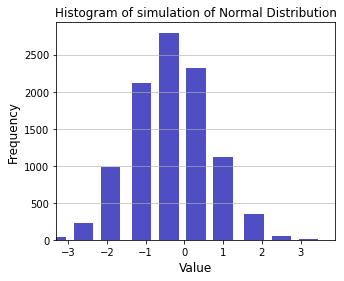

In [0]:
# Input
N =  10000

# Calculate simulation
# np.random.seed(100)
np_norm_hist = np.random.normal(0,1,N)
print('Check: Mean= ', np.round(np_norm_hist.mean(),3), ' StDev= ', np.round(np_norm_hist.std(),3))
norm_hist,norm_bin_edges = np.histogram(np_norm_hist)
norm_bin_edges = np.round(norm_bin_edges,1)
print('Check: norm_hist= ', norm_hist)
print('Check: norm_bin_edges= ', norm_bin_edges, '\n')

# Plot 
plt.figure(figsize=[5,4])
plt.bar(norm_bin_edges[:-1], norm_hist, width=0.5, color='#0504aa', alpha=0.7)
plt.xlim(min(norm_bin_edges),max(norm_bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Histogram of simulation of Normal Distribution', fontsize='12')
plt.show()

Consider standard Black-Scholes p.d.f.

Shape of simulation paths_1=  (10000, 252)
Shape of simulation paths_2=  (10000, 252) 

call_1 price= 7.8947
put_1 price=  8.0801
call_2 price= 11.8056
put_2 price=  12.0794


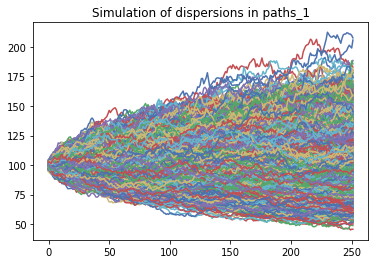

In [50]:
# Input
vol_1 = 0.2
vol_2 = 0.3
strike = 100
s_0 = 100
year_days = 252
T = 1
N = 10000

# Create simulations
sim_rand = np.random.randn(N,T*year_days)
paths_1 = np.cumproduct(1+sim_rand*vol_1/np.sqrt(year_days),1)*s_0
paths_2 = np.cumproduct(1+sim_rand*vol_2/np.sqrt(year_days),1)*s_0

print('Shape of simulation paths_1= ', paths_1.shape)
print('Shape of simulation paths_2= ', paths_2.shape, '\n')

# print('Check simulation:')
# print('First 10 samples=', paths_1[-1:,T*year_days-1][0])
# print('First 10 samples=', paths_1[N-1][0:T*year_days][T*year_days-1], '\n')

# Plot simulation
for i in paths_1: plt.plot(i)
plt.title('Simulation of dispersions in paths_1', fontsize='12')

# Price
call_1 = np.mean((((paths_1[:,-1]-strike)))*((paths_1[:,-1]-strike)>0))
put_1 = np.mean((((strike-paths_1[:,-1])))*((strike-paths_1[:,-1])>0))
call_2 = np.mean((((paths_2[:,-1]-strike)))*((paths_2[:,-1]-strike)>0))
put_2 = np.mean((((strike-paths_2[:,-1])))*((strike-paths_2[:,-1])>0))

print('call_1 price=', round(call_1,4))
print('put_1 price= ', round(put_1,4))
print('call_2 price=', round(call_2,4))
print('put_2 price= ', round(put_2,4))

Check: Mean=  0.997  StDev=  0.179 



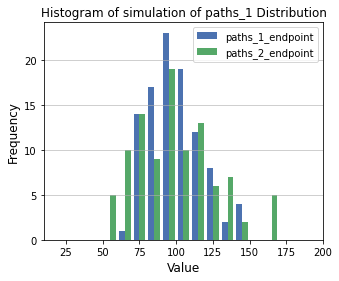

In [46]:
# Check
print('Check: Mean= ', np.round((paths_1[:,-1]/s_0).mean(),3),
      ' StDev= ', np.round(np.log(paths_1[:,-1]/s_0).std(),3), '\n')

paths_1_endpoint = paths_1[:,-1]
paths_2_endpoint = paths_2[:,-1]
bins = np.linspace(10, 200, num=20)

# Plot p.d.f.
plt.figure(figsize=[5,4])
plt.style.use('seaborn-deep')
plt.hist([paths_1_endpoint, paths_2_endpoint], bins, label=['paths_1_endpoint', 'paths_2_endpoint'])
plt.legend(loc='upper right')
plt.xlim(min(bins),max(bins))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Histogram of simulation of paths_1 Distribution', fontsize='12')
plt.show()